TESTED FEATURES: 
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64],
      dtype='int64')
TESTING FOR: 
65
OCCURANCES IN RAW DATA FOR 65: 
{1: 50, 2: 49, 3: 50, 4: 50, 5: 49, 6: 49, 7: 50, 8: 37, 9: 49, 10: 50, 11: 49, 12: 46, 13: 43, 14: 47, 15: 43, 16: 50, 17: 49, 18: 50, 19: 48, 20: 25}
{1: 50, 2: 49, 3: 50, 4: 50, 5: 49, 6: 49, 7: 50, 8: 37, 9: 49, 10: 50, 11: 49, 12: 46, 13: 43, 14: 47, 15: 43, 16: 50, 17: 49, 18: 50, 19: 48, 20: 25}
Epoch 1/1500
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0474 - loss: 3.4466 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.1016 - val_loss: 2.8331 - val_precision: 0.5714 - val_recall: 0.0214 - learning_rate: 0.0010
Epoch 2/1500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0786 - loss

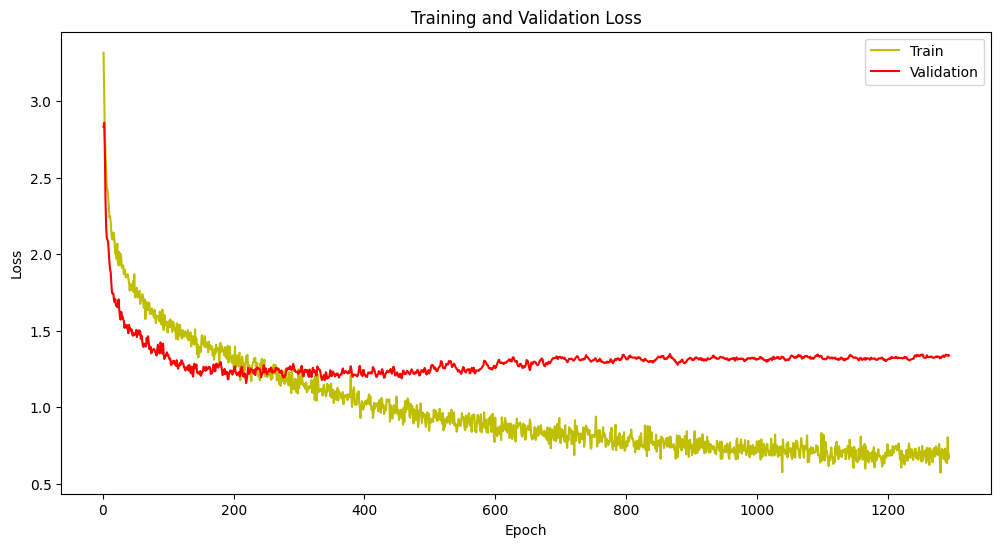

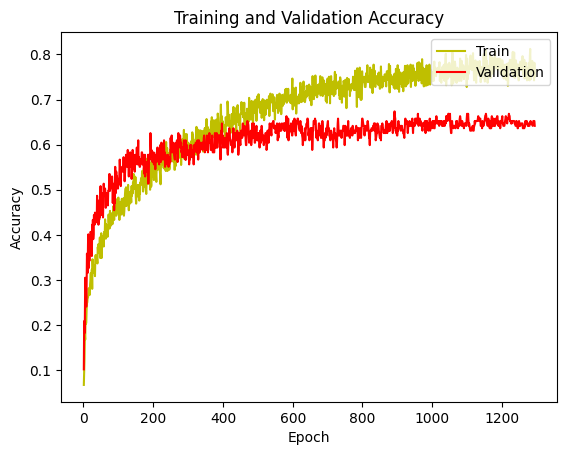

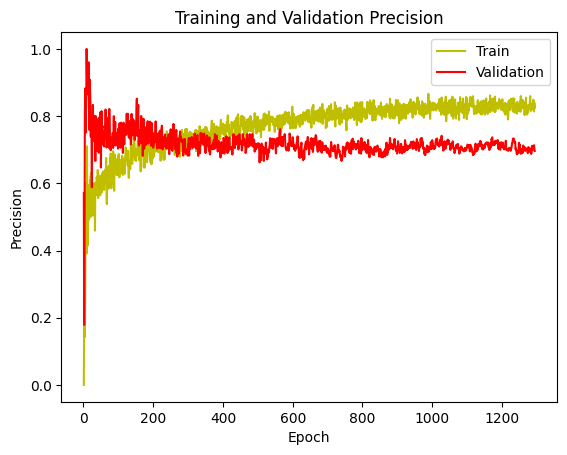

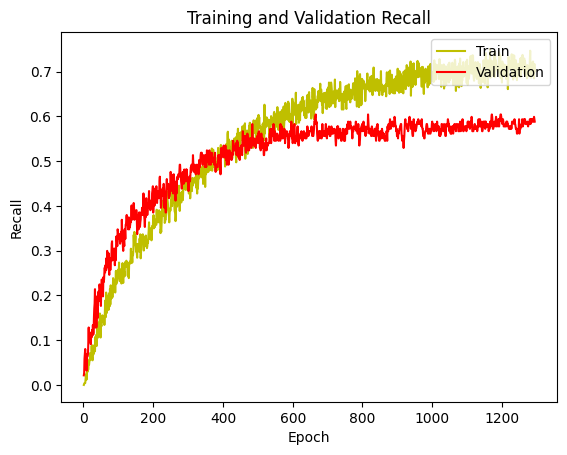

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


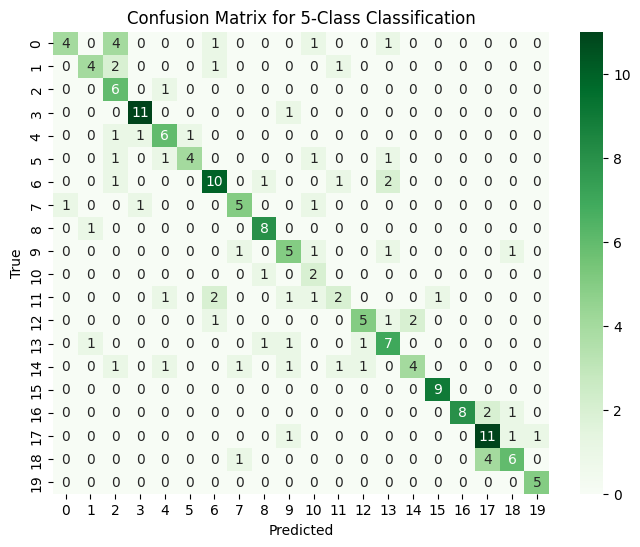

In [12]:
#JJ McCauley + LOGAN KELSCH 
#TEST NN 1

#IMPORT LIBRARIES-------------------------------------------------------

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from keras.optimizers import SGD
from keras.initializers import GlorotUniform
from keras.initializers import RandomNormal
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE

#hahaha dont turn this on with high epoch or else
#tf.config.experimental.set_memory_growth

#LOAD DATA FROM CSV-------------------------------------------------------

# Load the dataset
data = pd.read_csv('FoodTypeDataset.csv',header=None)

#testing random feature drops
#data = data.drop(columns='FT')
#data = data.drop(columns='FullK')
#data = data.drop(columns='diffKD')
#data = data.drop(columns='OB')
#data = data.drop(columns='OS')
#data = data.drop(columns='vol')
#data = data.drop(columns='s15')
#data = data.drop(columns='s30')
#data = data.drop(columns='s60')
#data = data.drop(columns='ToD')
#data = data.drop(columns='Inertias')
#data = data.drop(columns='percBB')
#data = data.drop(columns='spreadRSI')
#data = data.drop(columns='ADX')
#data = data.drop(columns='RSI')
#data = data.drop(columns='Wpercent')
#data = data.drop(columns='acc')

#TEMP DROP PRE-DUAL-OUTPUT NN

#data = data.drop(columns='CLASS')


#confirming X and Y features post training
Xfeatures = data.columns[:-1]
Yfeatures = data.columns[-1]
print("TESTED FEATURES: ")
print(Xfeatures)
print("TESTING FOR: ")
print(Yfeatures)

#DATA OPTIMIZATION------------------------------------------------------

print("OCCURANCES IN RAW DATA FOR ", Yfeatures, ": ", sep='')
unique, counts = np.unique(data.iloc[:, -1].values, return_counts=True)
print(dict(zip(unique,counts)))

#filtering before splitting could be useful if ABSOLUTELY mostly comprised of 'in'
#MARKET HOURS!
last_column = data.iloc[:, -1].values
unique, counts = np.unique(last_column, return_counts=True)
class_counts = dict(zip(unique, counts))

print(class_counts)


#cw = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2, 3: weight_for_3, 4: weight_for_4}
classWeights = counts

#PROCESS THE DATA-------------------------------------------------------

# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

#SMOTE OVERSAMPLING________________

#smote = SMOTE()
#X, y = smote.fit_resample(X,y)
#print('\n[PRE-SPLIT] Resampled Data size:',X.size,'--',y.size)

#__________________________________

#Encoding data
labelencoder = LabelBinarizer()
y = labelencoder.fit_transform(y)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#42, stratify=y)

# one-hot encode ? 

from tensorflow.keras.utils import to_categorical
#y_train = to_categorical(y_train, num_classes=4)
#y_test = to_categorical(y_test, num_classes=4)

#RESAMPLED DATA- POST SPLIT---------------------------------------------------------

#smote = SMOTE()
#X_resampled, y_resampled = smote.fit_resample(X_train,y_train)
#print('\nResampled Data size:',X_resampled.size)

#BUILD THE NEURAL NETWORK MODEL-------------------------------------------------------

#CUSTOM CALLBACK FOR PRECISION RATIO TRAINING VS VALIDATION--------------------------------------------------




#END CUSTOM LOSSES__________________________________________________________________________________________

#LEARNING RATES____________________________________________________________________________________________
from keras.optimizers.schedules import ExponentialDecay
lr_schedule = ExponentialDecay(
    #good rough val to start, .25, good val to end at .0015.
    #5k epoch should be: .25, 8565, .9995, true
    0.1,
    decay_steps=24,
    decay_rate=.99,
    staircase=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.90, 
    patience=32, 
    min_lr=1e-6
)

opt1 = SGD(learning_rate=0.01)
opt2  = tf.keras.optimizers.Adam(clipnorm=0.7)
opt3 = SGD(learning_rate=lr_schedule)
opt4 = SGD(learning_rate=0.001, momentum=0.99)

#BUILD AND LOAD MODEL__________________________________________________________________________________________
early_stopping = EarlyStopping(monitor='val_accuracy', patience=128, mode='max', restore_best_weights=True)

def build_model():
    model = tf.keras.Sequential([#currently 17 total features
        #tf.keras.layers.Input(shape=(X_train[1],)),
        tf.keras.layers.Dense(512),#kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.6),
        tf.keras.layers.Dense(256),#, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128),#,  kernel_regularizer=tf.keras.regularizers.l2(0.05)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(64),#, kernel_regularizer=tf.keras.regularizers.l2(0.05)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(20, activation='softmax')
    ])
    #AUC=tf.keras.metrics.AUC(curve='PR')
    met = ['precision','recall','accuracy']
    model.compile(optimizer=opt4,
                  loss='categorical_crossentropy'
                  ,metrics=met)
    return model



def load_model():
    #loaded_model = tf.keras.models.load_model('tupleTrain.keras', custom_objects={'custom_loss':custom_loss})
    loaded_model = tf.keras.models.load_model('multi_test1.keras')
    met = ['accuracy','precision','recall']
    loaded_model.compile(optimizer=opt3,
                         loss=met_ratio
                         , metrics=met)
    return loaded_model


#TRAIN THE MODEL WITH CUSTOMIZABLE EPOCHS-------------------------------------------------------

epochs = 1500


model = build_model()
#loaded_model = load_model()
history = model.fit(X_train, y_train, epochs=epochs,\
                    shuffle=True, verbose=1, validation_data=(X_test, y_test), callbacks=[reduce_lr,early_stopping], batch_size=10)
                    #class_weight=cw, callbacks=[metric_callback])

#EVALUATE THE MODEL AND VISUALIZE RESULTS-------------------------------------------------------

#_, acc = model.evaluate(X_test, y_test)
#print("Accuracy = ", (acc * 100.0), "%")

# LOSS
epochs = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(12, 6))
plt.plot(epochs, history.history['loss'], 'y', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
# ACCURACY
plt.plot(epochs, history.history['accuracy'], 'y', label='Training acc')
plt.plot(epochs, history.history['val_accuracy'], 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
'''
# AUC
plt.plot(epochs, history.history['AUC'], 'y', label='Training AUC')
plt.plot(epochs, history.history['val_AUC'], 'r', label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC Score')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
'''
# PRECISION
plt.plot(epochs, history.history['precision'], 'y', label='Training Precision')
plt.plot(epochs, history.history['val_precision'], 'r', label='Validation Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
# RECALL
plt.plot(epochs, history.history['recall'], 'y', label='Training Recall')
plt.plot(epochs, history.history['val_recall'], 'r', label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
# TPR
'''
TPR = history.history['TruePositives']/(history.history['TruePositives']+history.history['TrueNegatives'])
val_TPR = history.history['val_TruePositives']/(history.history['val_TruePositives']+history.history['val_TrueNegatives'])
plt.plot(epochs, TPR, 'y', label='Training TPR')
plt.plot(epochs, val_TPR, 'r', label='Validation TPR')
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('TP Rate')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

'''

#predicting the test set results
y_true = np.argmax(y_test, axis=1)  # Convert one-hot to class indices if needed
y_pred = np.argmax(model.predict(X_test), axis=1)  # Predictions to class indices

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=range(20), yticklabels=range(20))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for 5-Class Classification')
plt.show()



# Save the model
#model.save('epoch15k.keras')
# Load the model
#loaded_model = tf.keras.models.load_model('my_model.keras')

In [1]:
model.save('model-1.keras')

NameError: name 'model' is not defined